In [3]:
%load_ext tensorboard
%tensorboard --logdir data

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 32540), started 0:05:40 ago. (Use '!kill 32540' to kill it.)

In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/81/16/3aaaf911d8309b9afb29bff97e819c52b011d4ab184c7b01cec92abd018a/tensorflow-2.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/53/76/ac0d1daa8ce5b744cf95f4b9b3bde9bf3e19a0b6df1993c6488d0bb02061/h5py-3.10.0-c

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

def export_data(log_dir, ):
    data = {}
    for event_file in tf.compat.v1.train.summary_iterator(log_dir):
        for value in event_file.summary.value:
            if value.tag not in data:
                data[value.tag] = []
            data[value.tag].append((event_file.step, value.simple_value))
    return data

def smooth(scalars,weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

def plot(filenames,root_dir,smoothing=False,y_dataname='Eval_AverageReturn',loc='lower right',dx=10000):
    datas = []
    for filename in filenames:
        log_dir = root_dir + 'submit/data/' + filename
        tfevent_name = os.listdir(log_dir)[0]
        log_dir = log_dir + '/' + tfevent_name
        output_csv = root_dir + filename + '.csv'
        #TODO: SAVE AS A CSV
        datas.append(export_data(log_dir))

    x = []
    y = []
    for i, data in enumerate(datas):
        name = filenames[i]
        if smoothing:
            # x.append(smooth([t[-1] for t in data[y_dataname].Step],0.7))
            y.append(smooth([t[-1] for t in data[y_dataname]],0.7))
        else:
            # x.append([t[-1] for t in data[y_dataname].Step])
            y.append([t[-1] for t in data[y_dataname]])
    plotter(x,y,filenames,y_dataname, loc,dx)

def plotter(x,y,filenames,y_dataname,loc,dx):
    '''
    x: List
    y: List
    '''
    filenames_ = []
    for filename in filenames:
        filenames_.append('_'.join(filename.split('_')[:-2]))
    # fig = plt.subplot()
    if x != []:
        for i in range(len(x)):
            plt.plot(x[i],y[i])
        plt.xlabel('Environment Steps')
        if y_dataname == 'Eval_AverageReturn':
            plt.ylabel('Avg. Eval. Reward')
        elif y_dataname == 'Baseline_Loss':
            plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        plt.show()
    else:
        for i in range(len(y)):
            x = [i*dx for i in range(len(y[i]))]
            plt.plot(x,y[i])
        plt.xlabel('Environment Steps')
        # plt.ylabel('Q Values')
        plt.ylabel('Avg. Eval. Reward')
        # elif y_dataname == 'Baseline_Loss':
            # plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        # plt.legend(['reinforce1','reinforce10','reparameterize'],loc=loc)
        # plt.legend(['Humanoid-v4 SAC'],loc=loc)
        # plt.legend(['Single Critic','Clip Q','Double Q'],loc=loc)
        plt.show()    

root_dir = '/home/hansung/Repository/cs285/hw3/'


# Problem 2.4

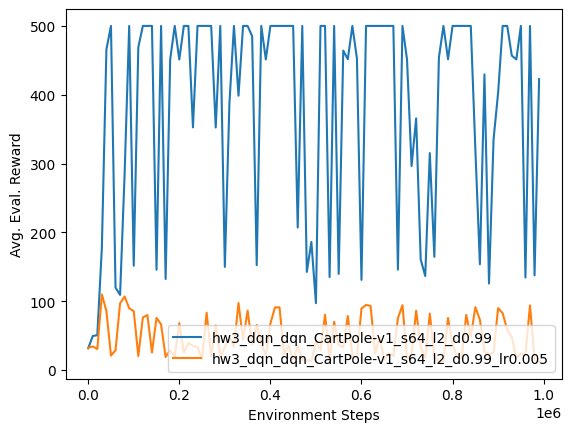

In [55]:
#Generate figures fo

filenames = ['hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_10-10-2023_19-23-24','hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_lr0.005_10-10-2023_02-15-47']
plot(filenames=filenames,root_dir=root_dir,smoothing=False,y_dataname='eval_return',dx=10000)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


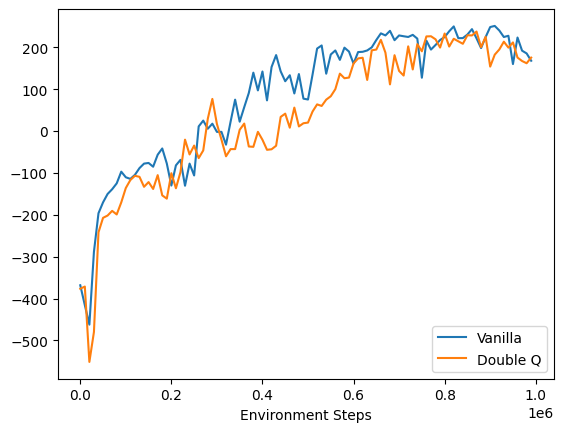

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

def export_data(log_dir, ):
    data = {}
    for event_file in tf.compat.v1.train.summary_iterator(log_dir):
        for value in event_file.summary.value:
            if value.tag not in data:
                data[value.tag] = []
            data[value.tag].append((event_file.step, value.simple_value))
    return data

def smooth(scalars,weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

def plot_multi(filenames1, filenames2,root_dir,smoothing=False,y_dataname='Eval_AverageReturn',loc='lower right',dx=10000):
    f1_datas = []
    f2_datas = []
    for filename in filenames1:
        log_dir = root_dir + 'submit/data/' + filename
        tfevent_name = os.listdir(log_dir)[0]
        log_dir = log_dir + '/' + tfevent_name
        output_csv = root_dir + filename + '.csv'
        #TODO: SAVE AS A CSV
        f1_datas.append(export_data(log_dir))

    for filename in filenames2:
        log_dir = root_dir + 'submit/data/' + filename
        tfevent_name = os.listdir(log_dir)[0]
        log_dir = log_dir + '/' + tfevent_name
        output_csv = root_dir + filename + '.csv'
        #TODO: SAVE AS A CSV
        f2_datas.append(export_data(log_dir))

    datas = []
    temp = []
    for data in f1_datas:
        x1= np.arange(0, dx*len(f1_datas[0][y_dataname]),dx)
        temp.append(np.interp(x1,[i*dx for i in range(len(data[y_dataname]))],[t[-1] for t in data[y_dataname]]))
    f1_avg = np.concatenate(temp).reshape((-1,len(x1)))
    datas.append(f1_avg.mean(axis=0))

    temp = []
    for data in f2_datas:
        x2= np.arange(0, dx*len(f1_datas[0][y_dataname]),dx)
        temp.append(np.interp(x2,[i*dx for i in range(len(data[y_dataname]))],[t[-1] for t in data[y_dataname]]))
    f2_avg = np.concatenate(temp).reshape((-1,len(x2),))
    datas.append(f2_avg.mean(axis=0))

    x = [x1,x2]
    y = []

    for i, data in enumerate(datas):
        if smoothing:
            y.append(smooth(data,0.1))
        else:
            y.append(data[i])
    plotter(x,y,['Vanilla','Double Q'],y_dataname, loc,dx)

def plotter(x,y,filenames_,y_dataname,loc,dx):
    '''
    x: List
    y: List
    '''

    # fig = plt.subplot()
    if x != []:
        for i in range(len(x)):
            plt.plot(x[i],y[i])
        plt.xlabel('Environment Steps')
        if y_dataname == 'Eval_AverageReturn':
            plt.ylabel('Avg. Eval. Reward')
        elif y_dataname == 'Baseline_Loss':
            plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        plt.show()
    else:
        for i in range(len(y)):
            x = [i*dx for i in range(len(y[i]))]
            plt.plot(x,y[i])
        plt.xlabel('Environment Steps')
        plt.ylabel('Avg. Eval. Reward')
        # elif y_dataname == 'Baseline_Loss':
            # plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        plt.show()    




# filenames1 = ['q2_pg_pendulum_best_hyperparam1_InvertedPendulum-v4_25-09-2023_21-45-30','q2_pg_pendulum_best_hyperparam2_InvertedPendulum-v4_25-09-2023_22-16-56','q2_pg_pendulum_best_hyperparam3_InvertedPendulum-v4_25-09-2023_22-48-34','q2_pg_pendulum_best_hyperparam4_InvertedPendulum-v4_25-09-2023_23-19-31','q2_pg_pendulum_best_hyperparam5_InvertedPendulum-v4_25-09-2023_23-50-26']
filenames1 = ['hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_10-10-2023_10-21-41','hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_10-10-2023_10-23-33','hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_10-10-2023_12-02-42']
filenames2 = ['hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_10-10-2023_12-03-07','hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_10-10-2023_14-05-33','hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_10-10-2023_14-05-41']
plot_multi(filenames1=filenames1,filenames2=filenames2,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=10000)

# Problem 2.5


# Problem 2.6

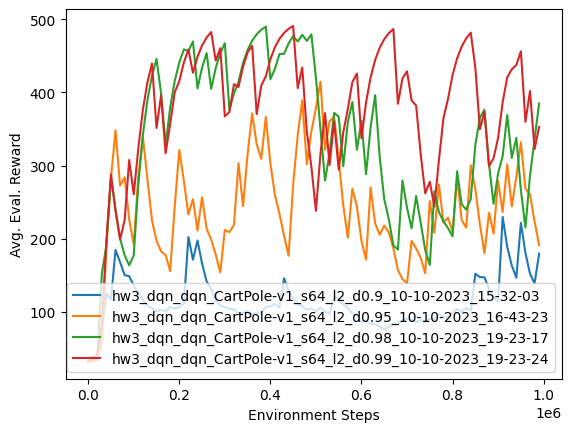

In [7]:
filenames = ['hw3_dqn_dqn_CartPole-v1_s64_l2_d0.9_10-10-2023_15-32-03','hw3_dqn_dqn_CartPole-v1_s64_l2_d0.95_10-10-2023_16-43-23','hw3_dqn_dqn_CartPole-v1_s64_l2_d0.98_10-10-2023_19-23-17','hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_10-10-2023_19-23-24']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=10000)

# Problem 3.1

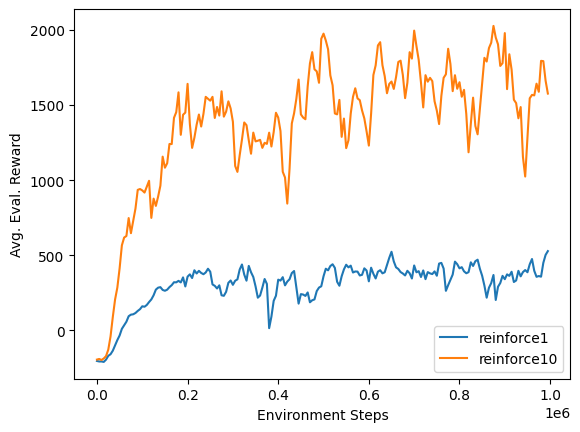

In [12]:
filenames = ['hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_10-10-2023_20-06-43','hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_10-10-2023_22-31-36']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=5000)

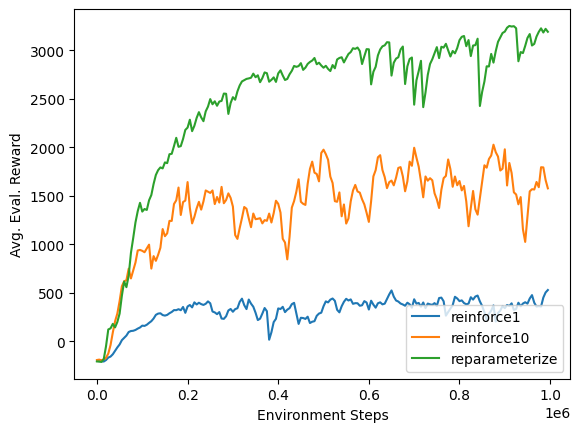

In [15]:
filenames = ['hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_10-10-2023_20-06-43','hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_10-10-2023_22-31-36','hw3_sac_reparametrize_HalfCheetah-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_stu0.005_11-10-2023_00-16-12']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=5000)

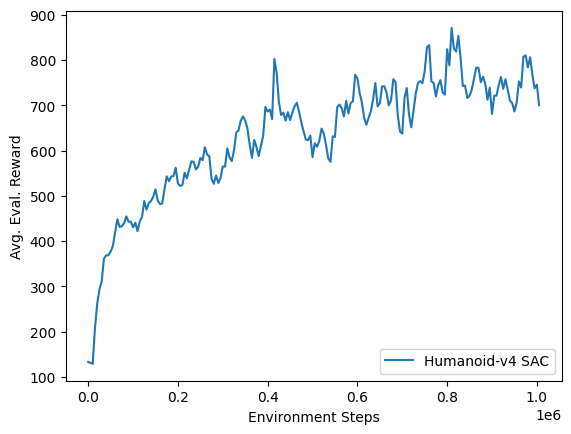

In [20]:
filenames = ['hw3_sac_sac_humanoid_Humanoid-v4_reparametrize_s256_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_11-10-2023_09-24-17']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=5000)

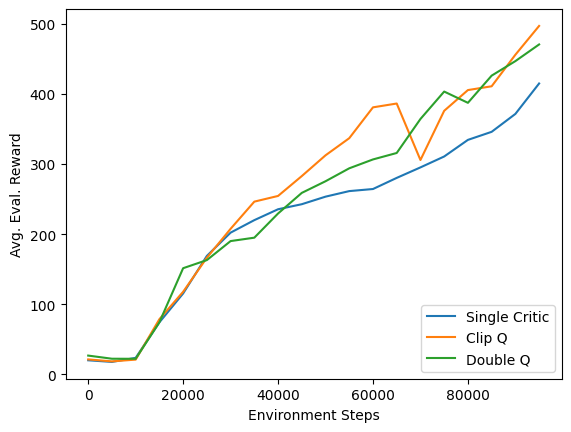

In [32]:
filenames = ['hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_16-10-2023_15-14-08','hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_16-10-2023_15-44-23','hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_16-10-2023_15-30-07']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='eval_return',dx=5000)

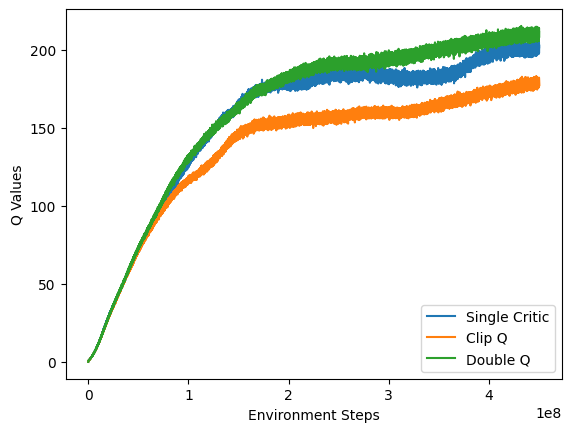

In [28]:
filenames = ['hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_16-10-2023_15-14-08','hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_16-10-2023_15-44-23','hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_16-10-2023_15-30-07']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname='q_values',dx=5000)

In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

def export_data(log_dir, ):
    data = {}
    for event_file in tf.compat.v1.train.summary_iterator(log_dir):
        for value in event_file.summary.value:
            if value.tag not in data:
                data[value.tag] = []
            data[value.tag].append((event_file.step, value.simple_value))
    return data

def smooth(scalars,weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

def plot(filenames,root_dir,smoothing=False,y_dataname='Eval_AverageReturn',loc='lower right',dx=10000,test=None):
    datas = []
    for filename in filenames:
        log_dir = root_dir + 'submit/data/' + filename
        tfevent_name = os.listdir(log_dir)[0]
        log_dir = log_dir + '/' + tfevent_name
        output_csv = root_dir + filename + '.csv'
        #TODO: SAVE AS A CSV
        datas.append(export_data(log_dir))

    x = []
    y = []
    for i, data in enumerate(datas):
        name = filenames[i]
        if smoothing:
            # x.append(smooth([t[-1] for t in data[y_dataname].Step],0.7))
            y.append(smooth([t[-1] for t in data[y_dataname[i]]],0.7))
        else:
            # x.append([t[-1] for t in data[y_dataname].Step])
            y.append([t[-1] for t in data[y_dataname[i]]])
    plotter(x,y,filenames,y_dataname, loc,dx,test)

def plotter(x,y,filenames,y_dataname,loc,dx,test):
    '''
    x: List
    y: List
    '''
    filenames_ = []
    for filename in filenames:
        filenames_.append('_'.join(filename.split('_')[:-2]))
    # fig = plt.subplot()
    if x != []:
        for i in range(len(x)):
            plt.plot(x[i],y[i])
        plt.xlabel('Environment Steps')
        if y_dataname == 'Eval_AverageReturn':
            plt.ylabel('Avg. Eval. Reward')
        elif y_dataname == 'Baseline_Loss':
            plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        plt.show()
    else:
        for i in range(len(y)):
            xx = [i*dx for i in range(len(y[i]))]
            if i == 1:
                xx = smooth(test[0],0.7)
                y[i] = smooth(test[1],0.7)
                print(len(xx))
            plt.plot(xx,y[i])
        plt.xlabel('Environment Steps')
        # plt.ylabel('Q Values')
        plt.ylabel('Avg. Eval. Reward')
        # elif y_dataname == 'Baseline_Loss':
            # plt.ylabel('Baseline loss')
        plt.legend(filenames_,loc=loc)
        # plt.legend(['reinforce1','reinforce10','reparameterize'],loc=loc)
        # plt.legend(['Humanoid-v4 Clip Q','Humanoid-v4 SAC','HW2 Humanoid'],loc=loc)
        # plt.legend(['eval_return','train_return'],loc=loc)
        # plt.legend(['Single Critic','Clip Q','Double Q'],loc=loc)
        plt.show()    

root_dir = '/home/hansung/Repository/cs285/hw3/'


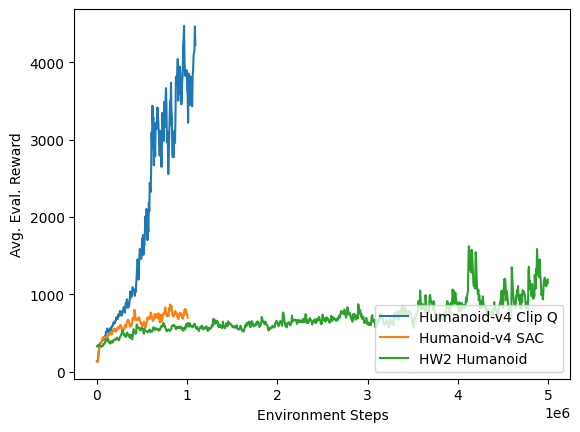

In [44]:
filenames = ['hw3_sac_sac_humanoid_Humanoid-v4_reparametrize_s256_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_11-10-2023_12-56-42','hw3_sac_sac_humanoid_Humanoid-v4_reparametrize_s256_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_11-10-2023_09-24-17','hw2_humanoid']
plot(filenames=filenames,root_dir=root_dir,smoothing=True,y_dataname=['eval_return','eval_return','Eval_AverageReturn'],dx=5000)

1000


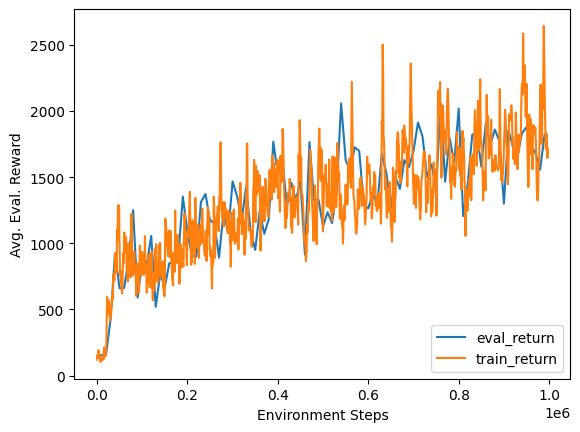

In [63]:
filenames = ['hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_11-10-2023_01-51-12','hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_11-10-2023_01-51-12']
plot(filenames=filenames,root_dir=root_dir,smoothing=False,y_dataname=['eval_return','train_return'],dx=10000,test=[t,t2])

In [61]:
t2 = [120,
190,
170,
120,
120,
320,
120,
120,
170,
120,
60,
60,
130,
120,
170,
80,
170,
120,
150,
140,
90,
310,
120,
330,
150,
120,
120,
120,
170,
200,
440,
1400,
350,
330,
820,
520,
400,
330,
380,
370,
570,
440,
690,
530,
660,
730,
490,
1210,
710,
690,
690,
1410,
820,
810,
570,
1850,
820,
1570,
1530,
1250,
1310,
1280,
440,
490,
500,
870,
490,
650,
540,
570,
990,
1370,
680,
1620,
840,
740,
1270,
1080,
740,
460,
970,
450,
660,
820,
1600,
620,
610,
860,
560,
1000,
2160,
460,
470,
720,
650,
1350,
740,
670,
1220,
690,
610,
750,
810,
520,
360,
1340,
400,
1210,
680,
650,
320,
760,
1430,
1190,
350,
1260,
890,
400,
750,
1340,
860,
780,
520,
770,
780,
740,
870,
1050,
1480,
300,
720,
960,
830,
450,
400,
1010,
990,
500,
1180,
1040,
740,
280,
620,
700,
1500,
300,
490,
1570,
320,
650,
540,
430,
510,
970,
800,
910,
330,
750,
810,
1540,
700,
770,
1330,
520,
400,
730,
700,
680,
700,
1340,
900,
1210,
640,
1280,
570,
450,
1070,
730,
720,
750,
660,
1150,
200,
720,
540,
550,
570,
950,
2310,
1070,
1040,
1010,
750,
1000,
700,
1520,
1120,
430,
1550,
910,
520,
700,
570,
650,
730,
580,
1500,
700,
840,
650,
1090,
560,
2330,
410,
790,
650,
1460,
630,
1420,
490,
930,
740,
320,
960,
1470,
1020,
940,
620,
690,
920,
1200,
910,
690,
780,
790,
1450,
1330,
1500,
790,
740,
1050,
610,
710,
1490,
1250,
930,
1340,
1570,
1680,
620,
670,
430,
840,
1010,
790,
1910,
940,
1290,
770,
860,
790,
1240,
430,
2510,
740,
1090,
710,
1400,
690,
890,
1550,
760,
1100,
520,
1370,
870,
1350,
1260,
670,
1870,
780,
810,
920,
740,
880,
1040,
1440,
630,
660,
1160,
1510,
1320,
1490,
720,
1520,
690,
1380,
470,
950,
1020,
730,
1070,
790,
360,
470,
1220,
860,
930,
2490,
1090,
340,
650,
1330,
1050,
1400,
1370,
1250,
1410,
1060,
810,
1940,
1390,
2370,
2000,
880,
690,
1190,
1080,
1590,
730,
1110,
1740,
940,
1430,
1060,
1280,
890,
960,
1090,
1640,
1140,
1040,
960,
740,
1070,
370,
1470,
1670,
1270,
890,
780,
1790,
1260,
730,
770,
990,
1050,
1220,
990,
970,
1020,
990,
1590,
410,
1610,
1780,
700,
2180,
1070,
920,
730,
1410,
1330,
790,
1220,
760,
670,
1770,
760,
990,
2180,
1340,
2660,
1760,
270,
1060,
780,
1160,
1070,
820,
870,
1260,
920,
2290,
1530,
2080,
1170,
690,
1200,
980,
2590,
1110,
1180,
1860,
1620,
1030,
1740,
1220,
1750,
640,
230,
1330,
1330,
1460,
1730,
1530,
1340,
690,
1120,
1230,
1130,
2230,
1370,
940,
1040,
1150,
2360,
1580,
940,
1780,
1000,
1290,
2450,
1510,
1200,
1880,
1020,
1280,
1890,
1620,
1380,
1650,
1130,
1530,
2040,
950,
1140,
1400,
1280,
1010,
2650,
1000,
1580,
1400,
1610,
2690,
1700,
1370,
880,
1170,
1060,
990,
950,
1270,
1590,
960,
1340,
1560,
1500,
1400,
1190,
1480,
1750,
920,
1430,
570,
1190,
940,
1640,
1460,
1720,
920,
1000,
1330,
1310,
1510,
1380,
1210,
1070,
920,
2910,
1040,
2980,
1380,
800,
2060,
810,
1300,
1380,
1180,
1180,
1070,
850,
790,
1180,
850,
890,
630,
1000,
980,
1440,
1280,
940,
1480,
1540,
1090,
1730,
2450,
1370,
1490,
760,
940,
990,
720,
1440,
1540,
1840,
920,
920,
910,
760,
1790,
1480,
1330,
2110,
2040,
2030,
2030,
1420,
1450,
1070,
2290,
1440,
1840,
770,
750,
790,
1920,
1930,
1450,
1830,
1060,
920,
1710,
1530,
880,
1440,
2350,
950,
1270,
990,
1280,
1180,
1460,
1420,
780,
2110,
2130,
620,
1280,
1540,
870,
1820,
2210,
1440,
960,
980,
1300,
2110,
2290,
920,
1810,
1220,
1640,
960,
780,
1780,
1380,
920,
850,
1100,
730,
1350,
1650,
1340,
910,
1720,
1690,
1070,
1460,
1160,
1260,
1360,
2290,
1520,
1320,
1560,
1930,
1350,
1250,
1530,
1270,
2640,
3240,
1430,
1270,
890,
1050,
1260,
1300,
1030,
1110,
810,
1050,
1340,
2000,
940,
1250,
2020,
1080,
1800,
1130,
1040,
1770,
1270,
1360,
1090,
1040,
970,
1540,
1580,
2350,
1310,
1470,
1750,
1600,
1370,
1090,
1140,
1360,
1480,
760,
1180,
1440,
1810,
1290,
1380,
1900,
1350,
1590,
750,
1450,
1040,
1240,
1640,
1110,
1400,
1140,
1660,
1050,
1400,
750,
1590,
3420,
1690,
4020,
1800,
650,
1790,
1310,
840,
1600,
1570,
1050,
1060,
1010,
1880,
1250,
980,
1240,
1980,
1190,
880,
910,
1030,
800,
1470,
2560,
1470,
1110,
580,
1670,
1440,
2000,
1500,
2280,
2020,
1850,
1590,
1670,
930,
1900,
1090,
1860,
1530,
2540,
1720,
1380,
2370,
1750,
1740,
1510,
1940,
1470,
1420,
1010,
2430,
1420,
1530,
2060,
1750,
3110,
2840,
1500,
1550,
1420,
1440,
1120,
1230,
1250,
1120,
2030,
1450,
730,
1780,
1730,
1200,
1700,
1460,
1120,
960,
1010,
1490,
1940,
1570,
1860,
1880,
1710,
1600,
1200,
550,
1930,
980,
1930,
1470,
2090,
1300,
970,
790,
1890,
840,
1390,
1690,
2090,
1240,
1620,
1610,
950,
1460,
760,
1580,
2240,
2170,
2920,
2250,
1530,
2410,
2500,
1160,
1430,
880,
1630,
1970,
2920,
1880,
1290,
2020,
1520,
1480,
2890,
2470,
1760,
1210,
1560,
850,
1550,
1420,
1030,
1930,
1720,
1270,
2130,
1620,
1460,
1080,
1840,
1110,
1940,
1470,
2520,
1450,
1750,
1700,
1330,
1450,
2100,
1680,
1040,
1700,
1570,
1030,
1790,
2620,
1520,
1900,
1410,
1020,
1260,
280,
1010,
2250,
1020,
1640,
890,
1690,
1270,
1810,
1320,
1230,
2320,
1630,
570,
1900,
1880,
1700,
1760,
1170,
2710,
2300,
1500,
1940,
900,
2410,
2650,
1980,
900,
2420,
2990,
820,
1670,
1630,
1730,
1170,
770,
2060,
1170,
1810,
1060,
2870,
2780,
1110,
2290,
900,
1730,
1920,
1500,
1980,
2330,
1120,
1360,
1420,
1840,
1600,
1380,
1940,
1340,
1570,
1610,
1480,
1610,
2340,
3020,
1250,
940,
1620,
1160,
1750,
1230,
1740,
1490,
1670,
1810,
2110,
1970,
2410,
1770,
1350,
1610,
1240,
1150,
1710,
2170,
2570,
1820,
1950,
2300,
1800,
1260,
1890,
1260,
1900,
1550,
1440,
1700,
2830,
1460,
1520,
1150,
2190,
1990,
1370,
2120,
1670,
1840,
2610,
2510,
2280,
1930,
3660,
1720,
1900,
2690,
1730,
1480,
1950,
2800,
1380,
1320,
1060,
1120,
1670,
3080,
1490,
1310,
2550,
1740,
1540,
1710,
1520,
1270,
2440,
2060,
1680,
1820,
1990,
1220,
700,
1180,
1540,
2150,
1560,
2360,
2770,
2410,
1090,
1480,
1750,
3000,
1760,
2700,
3630,
1710,
1290,
1410,
1390,
1770,
2060,
1580,
1390,
1880]

In [ ]:
t = [546,
1564,
2113,
2583,
4253,
5229,
5835,
6402,
7789,
8271,
8752,
9795,
10287,
10949,
11934,
12470,
13855,
14292,
15120,
15571,
15880,
16509,
17056,
17627,
18077,
19244,
19630,
20136,
20571,
21098,
22950,
26286,
26806,
27213,
27855,
28673,
29286,
29732,
30205,
30627,
31668,
33552,
34184,
34724,
35343,
36621,
37181,
38241,
38904,
40228,
40848,
42920,
44245,
45398,
45835,
46516,
47170,
47874,
48514,
49078,
50182,
50875,
51287,
52438,
53077,
54404,
55471,
56053,
56604,
58233,
59069,
61016,
61656,
63411,
64363,
64966,
65860,
66538,
67061,
67492,
68698,
69132,
69674,
70344,
72275,
72843,
75593,
76146,
76704,
77381,
78484,
78890,
79506,
80023,
80983,
82006,
82934,
83437,
84064,
84519,
85356,
86448,
87175,
87729,
88106,
89004,
89483,
90919,
93403,
94549,
94861,
95410,
96164,
96933,
97730,
98396,
98998,
100065,
101016,
101842,
102385,
102967,
103355,
104322,
104791,
105307,
106141,
106817,
108341,
108653,
109255,
109997,
110599,
111011,
111416,
113406,
114048,
114535,
115233,
115751,
116949,
118023,
118762,
119266,
120321,
121222,
121639,
122461,
122850,
123401,
123949,
124424,
124886,
125480,
126230,
127617,
128542,
129018,
130083,
130821,
131306,
131874,
132714,
133574,
133969,
134544,
136097,
137132,
137648,
138542,
139170,
139996,
140511,
141548,
142032,
142387,
143943,
144510,
145624,
146168,
146670,
147466,
147772,
148433,
150152,
150598,
151161,
151756,
153703,
154319,
155307,
155888,
157257,
157849,
160882,
162123,
163140,
164556,
165296,
165983,
166389,
167531,
168099,
168616,
169089,
169794,
170513,
171064,
171649,
172198,
173085,
173555,
175101,
175500,
178188,
178653,
179250,
179781,
180831,
181283,
183287,
183929,
184256,
185025,
185903,
186402,
187714,
188224,
188704,
189228,
189975,
190576,
191708,
192391,
193009,
193876,
194515,
196014,
197832,
199116,
199792,
200248,
200829,
201534,
203812,
204386,
205365,
207003,
208370,
208871,
209377,
209750,
210442,
211133,
211661,
212529,
213316,
214679,
215376,
215978,
216602,
218004,
218411,
219832,
220357,
221079,
221754,
222331,
222786,
223655,
224392,
224888,
225611,
228581,
229381,
230029,
231316,
232246,
234884,
236516,
237122,
237802,
240017,
240556,
241163,
241846,
242785,
243304,
243835,
244483,
245399,
246306,
247459,
247960,
248677,
249216,
250355,
250761,
251425,
252001,
252530,
253262,
255356,
255722,
256131,
256810,
258856,
259488,
261016,
261649,
262643,
263078,
264142,
264904,
266251,
267213,
267939,
270646,
271339,
271977,
272845,
273854,
274828,
275949,
276568,
277925,
279000,
279669,
280402,
283066,
283895,
284680,
285241,
286342,
287929,
289388,
290733,
291383,
292113,
293484,
294308,
294858,
295929,
296455,
297064,
297480,
299109,
299894,
300844,
303200,
303827,
304673,
305382,
306037,
306574,
307458,
308899,
309528,
310192,
310872,
311586,
312354,
314643,
315110,
316461,
317460,
318047,
319941,
320583,
321168,
323597,
324521,
325504,
326111,
327070,
327662,
328216,
329316,
329932,
331112,
331869,
332869,
333675,
334629,
334940,
336513,
338811,
342292,
344059,
344668,
345344,
346213,
346953,
348030,
348856,
349756,
350658,
351299,
351913,
352495,
353679,
355151,
356193,
357217,
358613,
359764,
360621,
361268,
362013,
362506,
363586,
364219,
365639,
366404,
367572,
368271,
369980,
370710,
371372,
372058,
373539,
375132,
377615,
380150,
383012,
383624,
384291,
385812,
386340,
387188,
388098,
388878,
390027,
391082,
391529,
392309,
393065,
393766,
394684,
396529,
397225,
397939,
399376,
400830,
401673,
402499,
403207,
405400,
405985,
407744,
408840,
409344,
410094,
410690,
411610,
412505,
413527,
414983,
415646,
416550,
417295,
417889,
419864,
420596,
421295,
422016,
422607,
423269,
425617,
426146,
426986,
427608,
428347,
429032,
431334,
431881,
433521,
434179,
434973,
435605,
436635,
438597,
439163,
439744,
440691,
442220,
444994,
446326,
446929,
447416,
448545,
449325,
451319,
452191,
452997,
454008,
454670,
455487,
456654,
457339,
458118,
458763,
460246,
460779,
461599,
462097,
463440,
463946,
464734,
465278,
466145,
466685,
467676,
468267,
469964,
470671,
472811,
475561,
476378,
477855,
478393,
479600,
480271,
480933,
482549,
483357,
484304,
485886,
486616,
487215,
487840,
488838,
489609,
490391,
491017,
491947,
492864,
493657,
494817,
496549,
497135,
497701,
498969,
499679,
500199,
500736,
501329,
505199,
506019,
508372,
509618,
510246,
510718,
511581,
513771,
514273,
514890,
515638,
516152,
517051,
517793,
518573,
519199,
519779,
520408,
520959,
522227,
523271,
523758,
524331,
525134,
525839,
526791,
527835,
528460,
530480,
531107,
531934,
532902,
533736,
534487,
536170,
537032,
537886,
538493,
539016,
541016,
541531,
544529,
545137,
545738,
546234,
546866,
548442,
549223,
550537,
551327,
552081,
553532,
554432,
554896,
555648,
556460,
557146,
558173,
559095,
559803,
560575,
561360,
562034,
562724,
563255,
564902,
565816,
566931,
567705,
568391,
568970,
570427,
571273,
573011,
573744,
575289,
576770,
579604,
580529,
582341,
583833,
584707,
585323,
586956,
587649,
588270,
590798,
591772,
593494,
594201,
594755,
595589,
598399,
599709,
600523,
601432,
603444,
604362,
605075,
605864,
606521,
607205,
607764,
608509,
609129,
610218,
611138,
612479,
613070,
614303,
615796,
616522,
618378,
618973,
620254,
620960,
621775,
622603,
623228,
624777,
625621,
627603,
628369,
629716,
630296,
631113,
632331,
633164,
634360,
635223,
635751,
636507,
638660,
639254,
640055,
640845,
641501,
642312,
643091,
643858,
644720,
647841,
648525,
649613,
650446,
651216,
653123,
654102,
654722,
656107,
657258,
659007,
660325,
660905,
661825,
662686,
664369,
665138,
666029,
667284,
668232,
668944,
669753,
671215,
671997,
674271,
675340,
678735,
679675,
680477,
681094,
681851,
682600,
683295,
684099,
686386,
687018,
687771,
688453,
689418,
690686,
692275,
693130,
693851,
695907,
696714,
697738,
698717,
699520,
700083,
700713,
701359,
702014,
702736,
706047,
707726,
708409,
709228,
709984,
710653,
713077,
714509,
715167,
716917,
717590,
719545,
720544,
722502,
725866,
726738,
727587,
728630,
729278,
731712,
733377,
733941,
735899,
736632,
739017,
740071,
740617,
741865,
743382,
743881,
744662,
746507,
747500,
749199,
749941,
750568,
751367,
751914,
752469,
753449,
754362,
755530,
756354,
758155,
758966,
760592,
761363,
761962,
762591,
763799,
764494,
765434,
766442,
769556,
770315,
771257,
775156,
776859,
778640,
779614,
780348,
781669,
782612,
783274,
784051,
784589,
785156,
786162,
787008,
787752,
789483,
790437,
791609,
792158,
792928,
793721,
796831,
797424,
799409,
800055,
800787,
801554,
802503,
803101,
803863,
804696,
805208,
806004,
807429,
808053,
809876,
810670,
812063,
813030,
814618,
815305,
816002,
816457,
817124,
818124,
820006,
820764,
821554,
823270,
824094,
825737,
826504,
827319,
828285,
829143,
829635,
830401,
833110,
834157,
834989,
836709,
837695,
838474,
839924,
841820,
842898,
844405,
846156,
847076,
847918,
848798,
850820,
851652,
852372,
853171,
854043,
855023,
857245,
858207,
860280,
861246,
861817,
863789,
864985,
867506,
868336,
869214,
870868,
871669,
872287,
873231,
874216,
875204,
875956,
877590,
880642,
881359,
883939,
884645,
885549,
886434,
889156,
891190,
891906,
892552,
893532,
894331,
894989,
895827,
896531,
897370,
898113,
898830,
899580,
900418,
901289,
902333,
903928,
905065,
907301,
907917,
909683,
910439,
911127,
911814,
912997,
914018,
916908,
917764,
920401,
921223,
921935,
922733,
923523,
924298,
925492,
926028,
927938,
928988,
930952,
932287,
932918,
933721,
934600,
936432,
937371,
939396,
940125,
940832,
941658,
942458,
944066,
945146,
945906,
946792,
948856,
949700,
950311,
951230,
952075,
952940,
953722,
955855,
956551,
957434,
958299,
959223,
960042,
961096,
961872,
962647,
963599,
964458,
965308,
965954,
968687,
969744,
970527,
973449,
975740,
976382,
977880,
978537,
979829,
980589,
981332,
982868,
983793,
984641,
985438,
986396,
987485,
988285,
989058,
990746,
992387,
993209,
994132,
994914,
995611,
996478,
997225,
998583,
999383]